# Python Web crawler of IMDB data Part 3:

## Data analysis of 1936-2017 IMDB film data- continued: The dangers of keeping outliers in a sample! Deleting outliers,  and implementing plots and additional exploratory data analysis.

#### I.e., This notebook will exclude all outliers as point of comparison with the Part I analysis

### Import data science libraries, and import the 1936-2017 IMDB dataset

In [34]:
#import data analysis libraries
import pandas as pd
import numpy as np
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


#import the CSV file that was previously exported from the data extracted via the webcrawler
imdb_data = pd.read_csv('imdb_data_1936-2017.csv')

imdb_data.head(10)

,Unnamed: 0,name,year,length,genre,imdb_rating,n_votes,metascore
0,50,Modern Times,1936,87,Comedy,8.5,184248,96
1,51,Reefer Madness,1936,66,Drama,3.8,7150,70
2,70,Snow White and the Seven Dwarfs,1937,83,Animation,7.6,160064,95
3,71,A Star Is Born,1937,111,Drama,7.6,6987,77
4,72,Pépé le Moko,1937,94,Crime,7.7,5515,98
5,100,The Adventures of Robin Hood,1938,102,Action,8.0,43218,97
6,110,The Wizard of Oz,1939,102,Adventure,8.0,345167,100
7,111,Gone with the Wind,1939,238,Drama,8.2,258837,97
8,112,Mr. Smith Goes to Washington,1939,129,Comedy,8.2,96371,73
9,113,Only Angels Have Wings,1939,121,Adventure,7.7,10694,86


## Data cleaning

In [2]:
#delete the Unnamed column
imdb_data = imdb_data.drop(columns = 'Unnamed: 0')
imdb_data.head()

,name,year,length,genre,imdb_rating,n_votes,metascore
0,Modern Times,1936,87,Comedy,8.5,184248,96
1,Reefer Madness,1936,66,Drama,3.8,7150,70
2,Snow White and the Seven Dwarfs,1937,83,Animation,7.6,160064,95
3,A Star Is Born,1937,111,Drama,7.6,6987,77
4,Pépé le Moko,1937,94,Crime,7.7,5515,98


In [4]:
#multiply the imdb scores by 10 to be more readily comparable with the metascore ratings: i.e., rating metric out of 100
imdb_data['imdb_rating_100'] = imdb_data['imdb_rating'] * 10
imdb_data['imdb_rating_100'].head(10)

0    85.0
1    38.0
2    76.0
3    76.0
4    77.0
5    80.0
6    80.0
7    82.0
8    82.0
9    77.0
Name: imdb_rating_100, dtype: float64

## Boxplots to identify outliers

Let's re-implement boxplots of IMDB ratings and metascores. This way, the outliers can be easily identified.

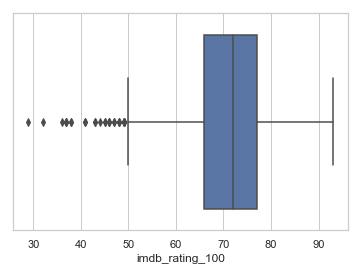

In [5]:
#Show box plots of imdb_ratings and metascores to get a better sense of the range and outliers of the data

#use a white grid in background for these plots
sns.set(style = "whitegrid")

#First plot: boxplot of IMDB ratings, transformed to be out of 100 points possible: i.e., imdb_rating_100
fig_box = sns.boxplot(imdb_data['imdb_rating_100'])

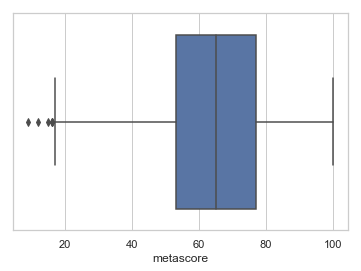

In [6]:
#Now, show boxplot of metascores
fig_box = sns.boxplot(imdb_data['metascore'])

For IMDB ratings, outliers appear to be IMDB ratings that scored less than or equal to 50 (i.e., 5 at the original IMDB scale out of 10). For metascores, outliers constitute ratings less than or equal to 16.

## Delete outliers

In [8]:
#delete outliers from the imdb_data_100 column
#start by defining an index of the range of values that need to be deleted

indexN = imdb_data[(imdb_data['imdb_rating_100'].le(50))].index
                   
#drop the specified ranges of data to delete these outliers from the dataframe
imdb_data.drop(indexN, inplace=True)

In [13]:
#sanity check: ensure that the minimum value is no lower than 50
imdb_data['imdb_rating_100'].min()

51.0

In [14]:
#delete outliers from the length column
#start by defining an index of the range of values that need to be deleted
#use Pandas' or operator--(i.e., |)-- to specify both conditions

indexN2 = imdb_data[(imdb_data['metascore'].le(16))].index
                   
#drop the specified ranges of data to delete these outliers from the dataframe
imdb_data.drop(indexN2, inplace=True)

In [15]:
#sanity check: ensure that the minimum value is no lower than 16
imdb_data['metascore'].min()

17

Now that all outliers have been deleted from the metascore and IMDB rating (converted to 100 point scale) columns, let's proceed with some plots and analysis, and compare and contrast the results with that of Part I. 

Let's first export the data to a new CSV file so these changes are saved.

In [31]:
#export latest changes on dataframe to CSV
imdb_data.to_csv('imdb_data_1936-2017_no_outlier.csv')

## Exploratory data analysis: summary stats, scatter plots, etc.

In [16]:
#Calculate various statistics for the numerical variables
#compare with stats from Part I
 
imdb_data['imdb_rating_100'].mean(), imdb_data['imdb_rating_100'].median(), imdb_data['imdb_rating_100'].std()

(71.69926650366749, 72.0, 7.271706452127147)

While the median is exactly the same (as expected), somewhat surprisingly, the mean is actually very similar to that of Part I (i.e., with outliers intact). This shows the outliers did not significantly impact the medium tendencies of the data, but of course this does not tell the whole picture (e.g., the variation in the data).

For example, the standard deviation is now a bit smaller relative to the mean, showing the data are not as noisy around the mean as they were in Part I. 

In [17]:
imdb_data['metascore'].mean(), imdb_data['metascore'].median(), imdb_data['metascore'].std()

(65.08557457212714, 65.0, 16.55191123062339)

The median of course is exactly the same. The mean is only slightly higher and the standard deviation is only a bit higher, relative to that of Part I.

Now, I can start re-implenting plots and other visualizations and analysis to compare with Part I.

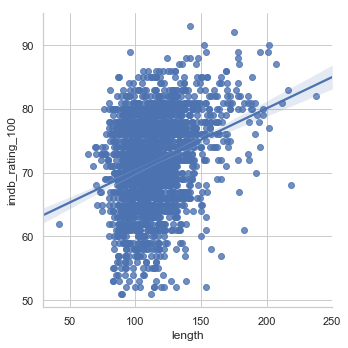

In [19]:
#imlement a scatterplot of film length and imdb_rating
sns.lmplot('length', 'imdb_rating_100', data=imdb_data)

Overall, the corrrelation between film length and IMDB ratings has not changed much. Interestingly, there is a slightly higher positive correlation between the 2 variables. 

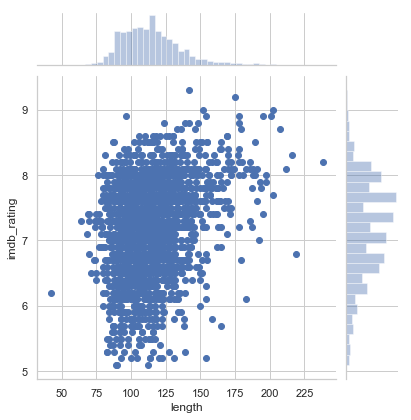

In [21]:
sns.jointplot(x='length', y='imdb_rating_100', data = imdb_data)

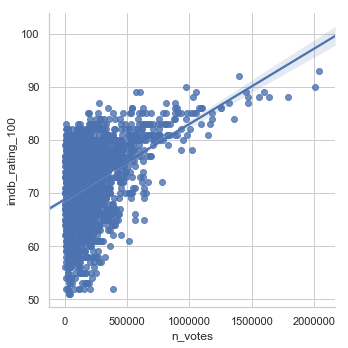

In [23]:
#plot of n_votes and IMDB ratings
sns.lmplot('n_votes', 'imdb_rating_100', data=imdb_data)

Again, the correlation between the number of IMDB votes and the IMDB ratings is similar to that of Part I. Perhaps there is a very slightly higher positive correlation, but it's not as pronounced as the change for the film length and IMDB rating correlation. 

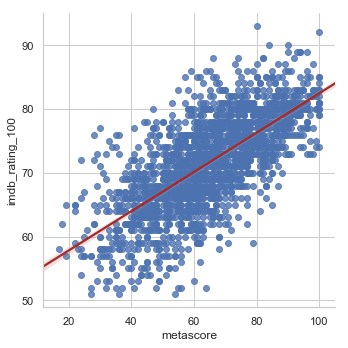

In [27]:
sns.lmplot(x='metascore', y='imdb_rating_100', data = imdb_data, line_kws={'color':'brown'})

In [ ]:
This plot also looks strikingly similar to that of Part I. There might be a very slight increase in correlation, but if so, it may very well not be statistically different from 0.

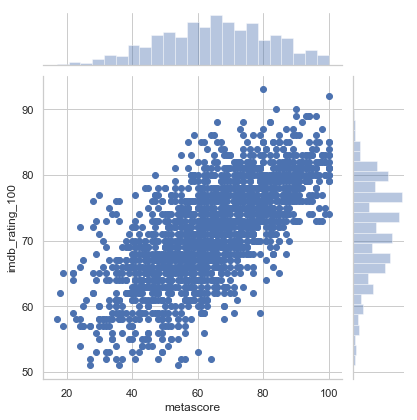

In [28]:
sns.jointplot(x='metascore', y='imdb_rating_100', data = imdb_data)

Overall, the results are similar to that of Part I for these 2 variables. Metascore ratings tend to correlate with IMDB ratings fairly closely. However, the overall ratings do tend to be moderately higher for IMDB ratings. Whereas the lowest metascore ratings are around  For example, the lowest metascore ratings are about 25 to 30 points lower than that of IMDB ratings. The highest metascore ratings also have a mix of IMDB ratings, ranging from an only-modestly-better-than-average 75/100 IMDB rating (i.e, 7.5) to 92 (9.2),. However, only this one film actually got an IMDB rating exceeding 90 (9), which also had a perfect metascore of 100.

### Plots examining the data over time

Now, let's implement a few plots that weren't used in Part I. For example, let's see the IMDB ratings over time. This can help convey whether IMDB ratings (which are a measure of movie-goers' preferences) have changed much over time.

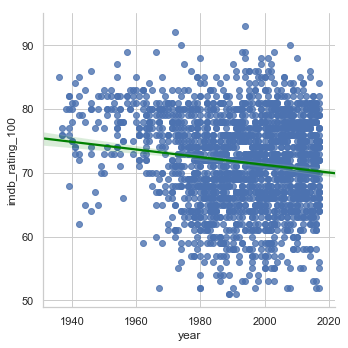

In [29]:
sns.lmplot(x='year', y='imdb_rating_100', data = imdb_data, line_kws={'color':'green'})

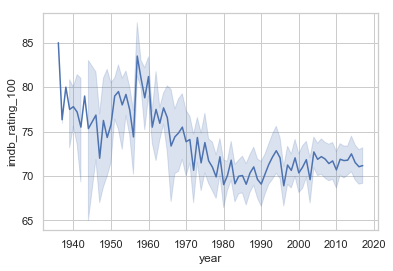

In [24]:
sns.lineplot('year', 'imdb_rating_100', data=imdb_data)

The plots (especially the lineplot) show a moderate decline in IMDB ratings over time. 

However, as revealed by the lineplot, the most marked decline in IMDB ratings was from the early-1960s to the late 1970s. By the late 1970s to early 1980s, IMDB ratings reached a global low-point, after which IMDB ratings begin to go up a bit, but still a solid 5-10 points lower than its peak in the late 1930s to early 1960s. 

The global max is in the late 1930s (but this is misleading since there are so few films in the sample from this period). A more meaningful observation is that the 2nd-highest maximum is that of 1958, and a local max (not much lower, either) in 1960. Given these years have a decent sample size (about 50+ each), this does show a markedly higher level of IMDB ratings for that eariler period of films. 

Given the near absolute lack of data from the late 1930s, however, these plots are probably only meaningful from a quantitative standpoint for data from the 1950s and on. Even judged from the standpoint of films starting from the 1950s, IMDB ratings have tended to be about 5+ points lower on a fairly consistent basis since the late 1970s. 

Another complicating factor, however, is that this sample only includes films that have metascore ratings, so this may constitute another form of sample bias. A subsequent notebook will extract data from IMDB to address whether this is the case: i.e., by extracting data for a sample that includes any films with IMDB ratings). 

In [ ]:
#now show a lineplot of metascores over time

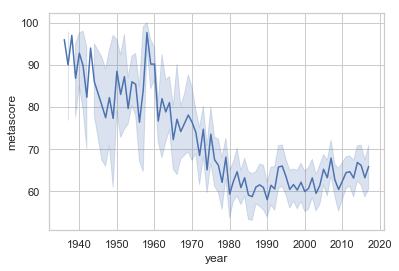

In [30]:
sns.lineplot('year', 'metascore', data=imdb_data)

Given the moderately high degree of positive correlaiton between metascores and IMDB ratings, it isn't terribly surprising to see that the trends of metascore ratings are also fairly similar to that of IMDB ratings. 

For example, the highest maxima are in the late 1930s and late 1950s to early 1960s, exactly the same as that of the IMDB ratings.

Similarly, the lowest points of the metascores is for films released around the early 1980s. Metascores, just like IMDB ratings, have remained fairly steady since the 1990s, and still quite a bit lower than the peaks from the 1950s and 1960s. 

Thus, even based on average movie critic reviews, the perceived quality of films has declined moderately over time, but the era of 1990s to the present shows a modest increase in quality relative to the low-point of the often-so-denigrated era of the early 1980s (notwithstanding the occasional calssic such as the original Star Wars trilogy). 